In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/umang datasets/anxiety.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,How often do you feel restless when you have a lot on your mind?,Do you find yourself worrying about things that others seem to brush off?,How often do you feel like you can't unwind after a long day?,"When faced with a new situation, how often do you feel uneasy?",How frequently do you avoid social events because of how you feel?,Do you ever feel like your heart races when you're under pressure?,How often do you have trouble focusing on a task because you’re distracted by your thoughts?,"When something unexpected happens, how often do you feel overwhelmed?",How frequently do you seek out friends or family for support when you're feeling off?,"Do you find it hard to relax, even when you have time to yourself?",Final Score
0,3,4,4,3,1,3,2,4,3,1,61.423358
1,4,4,4,3,4,2,2,1,0,3,65.145985
2,3,3,2,4,3,2,4,3,3,4,76.003650
3,3,0,2,1,1,3,2,0,4,4,44.361314
4,1,2,2,3,2,2,0,1,4,4,56.459854


In [ ]:
df.describe()

,How often do you feel restless when you have a lot on your mind?,Do you find yourself worrying about things that others seem to brush off?,How often do you feel like you can't unwind after a long day?,"When faced with a new situation, how often do you feel uneasy?",How frequently do you avoid social events because of how you feel?,Do you ever feel like your heart races when you're under pressure?,How often do you have trouble focusing on a task because you’re distracted by your thoughts?,"When something unexpected happens, how often do you feel overwhelmed?",How frequently do you seek out friends or family for support when you're feeling off?,"Do you find it hard to relax, even when you have time to yourself?",Final Score
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.453000,2.43750,2.448250,2.418250,2.477000,2.493750,2.458000,2.483000,2.468250,2.421500,55.513221
std,1.291978,1.29345,1.280325,1.280713,1.285645,1.279988,1.268518,1.270675,1.288374,1.297019,12.819449
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.649635
25%,1.000000,1.00000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,46.222628
50%,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,55.218978
75%,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,65.145985
max,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,85.000000


In [ ]:
col_name = 0
for col in df.columns:
    df.rename(columns={col: str(col_name)}, inplace=True)
    col_name += 1


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3,4,4,3,1,3,2,4,3,1,61.423358
1,4,4,4,3,4,2,2,1,0,3,65.145985
2,3,3,2,4,3,2,4,3,3,4,76.003650
3,3,0,2,1,1,3,2,0,4,4,44.361314
4,1,2,2,3,2,2,0,1,4,4,56.459854


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = df.drop('10', axis=1)
y = df['10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')


MAE: 4.442604975392613, MSE: 28.100732586043332, R²: 0.8261725169863579


In [ ]:
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,46.843066,49.805657
1,55.218978,59.335584
2,61.423358,64.286679
3,57.700730,61.088321
4,22.335766,35.144708
5,44.361314,44.978650
6,53.047445,48.285584
7,55.529197,50.441606
8,72.901460,69.105931
9,27.299270,34.338139


<Figure size 2400x1200 with 0 Axes>

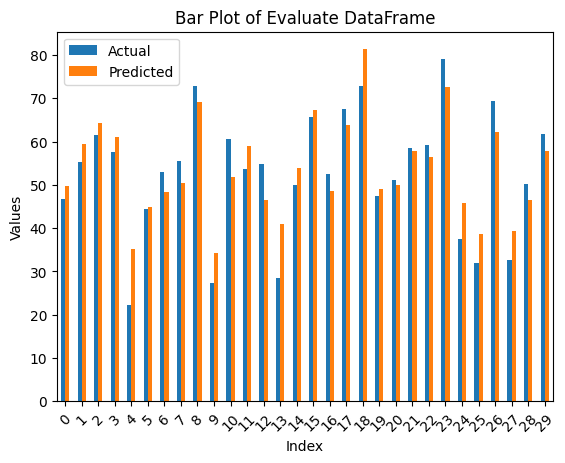

In [ ]:
plt.figure(figsize=(24, 12))
evaluate.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Fitting the training data to our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#score of this model
regressor.score(X_test, y_test)


0.8738597249292918

In [ ]:
# predict the y values
y_pred_lin_reg=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate_lin_reg = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred_lin_reg.flatten()})
evaluate_lin_reg.head(10)

,Actual,Predicted
0,46.843066,52.611109
1,55.218978,58.071805
2,61.423358,64.556339
3,57.700730,63.604596
4,22.335766,28.572707
5,44.361314,44.457576
6,53.047445,46.728952
7,55.529197,52.652969
8,72.901460,69.914346
9,27.299270,30.474918


<Figure size 2400x1200 with 0 Axes>

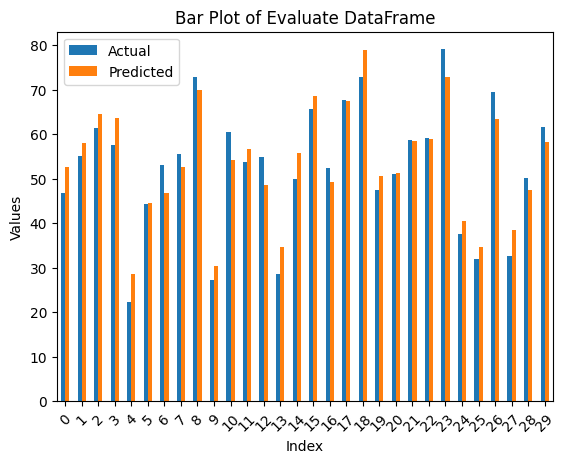

In [ ]:
plt.figure(figsize=(24, 12))
evaluate_lin_reg.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle
with open(f'lin_reg_anxiety_model.pkl', 'wb') as file:
        pickle.dump(regressor, file)

In [ ]:
with open('lin_reg_anxiety_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(np.array([[1,1,2,4,1,2,0,0,1,2]]))
print("Predictions:", predictions)

Predictions: [38.3449519]
